In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.insert(0, "../src") 

from feature_engineering import FeatureCreation

In [37]:
df = pd.read_csv('../data/raw/airplane_price_dataset.csv')

In [38]:
fc = FeatureCreation(df)
df = fc.create_Company().change_Age().create_Cost_per_km().create_HMC_per_person().getDataset()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model                        12377 non-null  object 
 1   Year_of_Manufacture          12377 non-null  int64  
 2   Number_of_Engines            12377 non-null  int64  
 3   Engine_Type                  12377 non-null  object 
 4   Capacity                     12377 non-null  int64  
 5   Range_(km)                   12377 non-null  int64  
 6   Fuel_Consumption_(L/hour)    12377 non-null  float64
 7   Hourly_Maintenance_Cost_($)  12377 non-null  float64
 8   Age                          12377 non-null  int64  
 9   Sales_Region                 12377 non-null  object 
 10  Price_($)                    12377 non-null  float64
 11  Company                      12377 non-null  object 
 12  Cost_per_km                  12377 non-null  float64
 13  HMC_per_person  

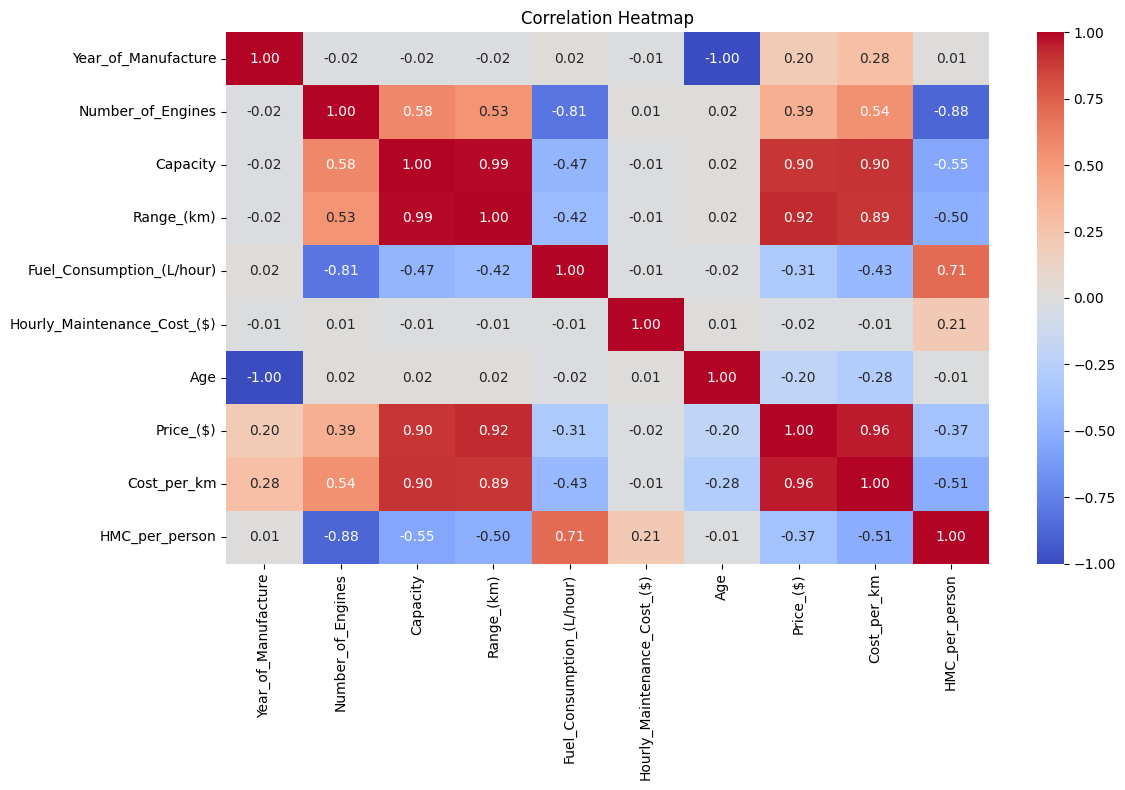

In [40]:
df_num = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../visuals/heatmap_correlation.png")
plt.show()

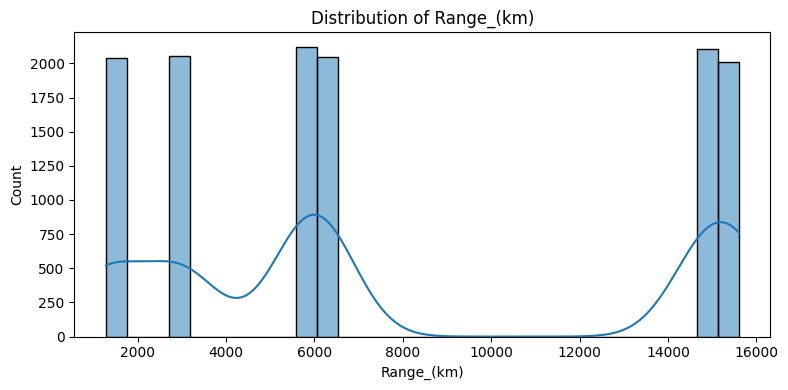

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(df['Range_(km)'], kde=True, bins=30)
plt.title("Distribution of Range_(km)")
plt.tight_layout()
plt.savefig("../visuals/Range_(km).png")
plt.show()

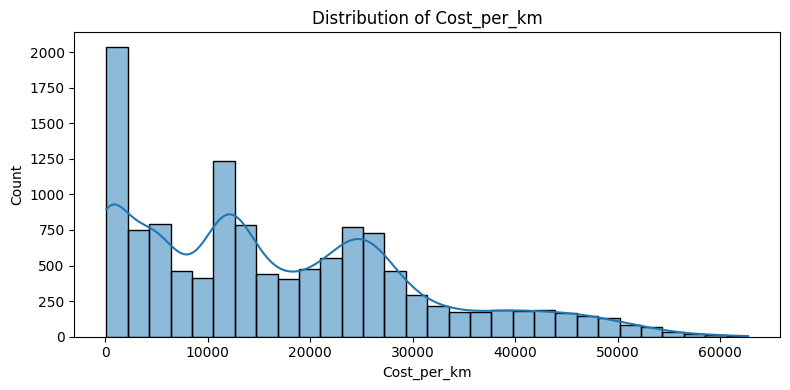

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['Cost_per_km'], kde=True, bins=30)
plt.title("Distribution of Cost_per_km")
plt.tight_layout()
plt.savefig("../visuals/dist_cost_per_km.png")
plt.show()

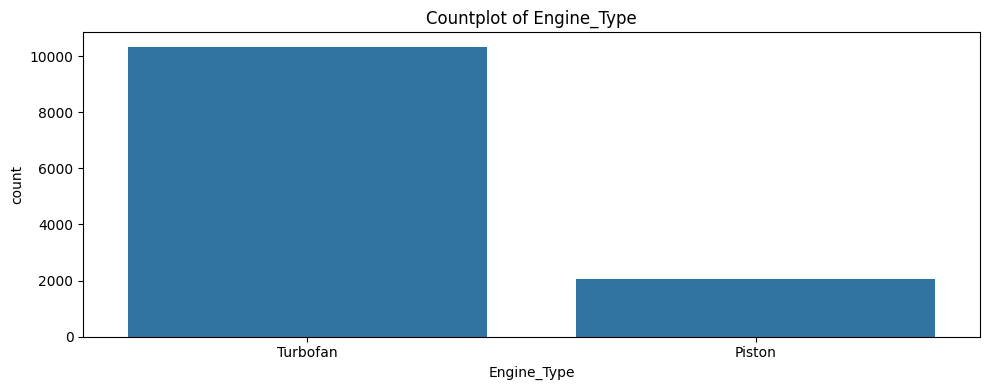

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(x='Engine_Type', data=df, order=df['Engine_Type'].value_counts().index)
plt.title("Countplot of Engine_Type")
plt.tight_layout()
plt.savefig("../visuals/count_engine_type.png")
plt.show()

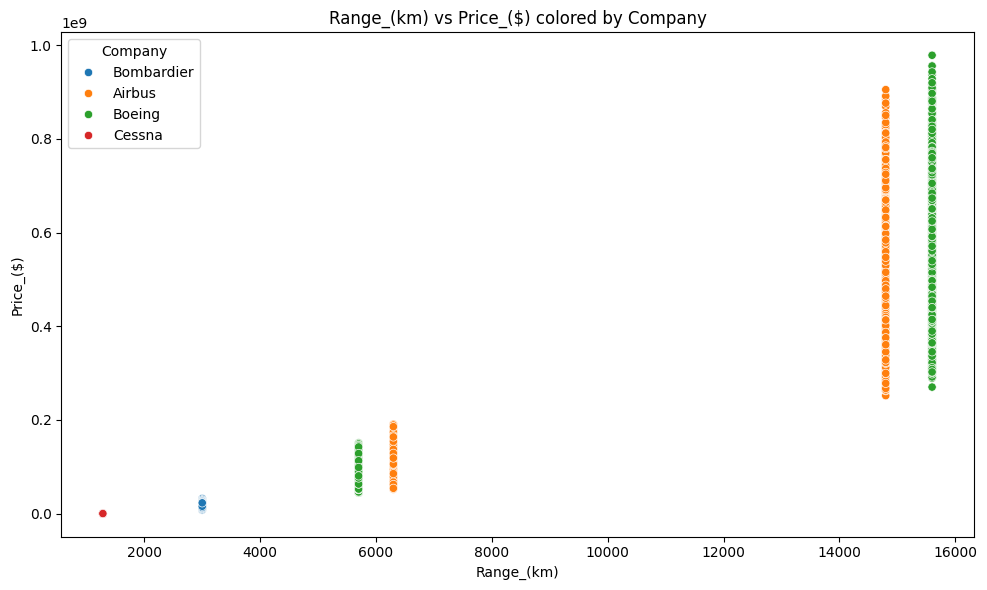

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Range_(km)', y='Price_($)', hue='Company', data=df)
plt.title("Range_(km) vs Price_($) colored by Company")
plt.tight_layout()
plt.savefig("../visuals/scatter_range_price.png")
plt.show()

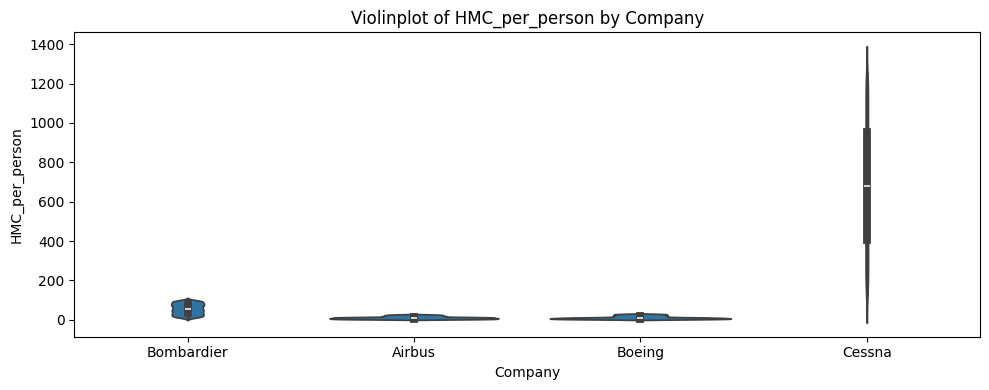

In [45]:
plt.figure(figsize=(10,4))
sns.violinplot(x='Company', y='HMC_per_person', data=df)
plt.title("Violinplot of HMC_per_person by Company")
plt.tight_layout()
plt.savefig("../visuals/violin_hmc_company.png")
plt.show()

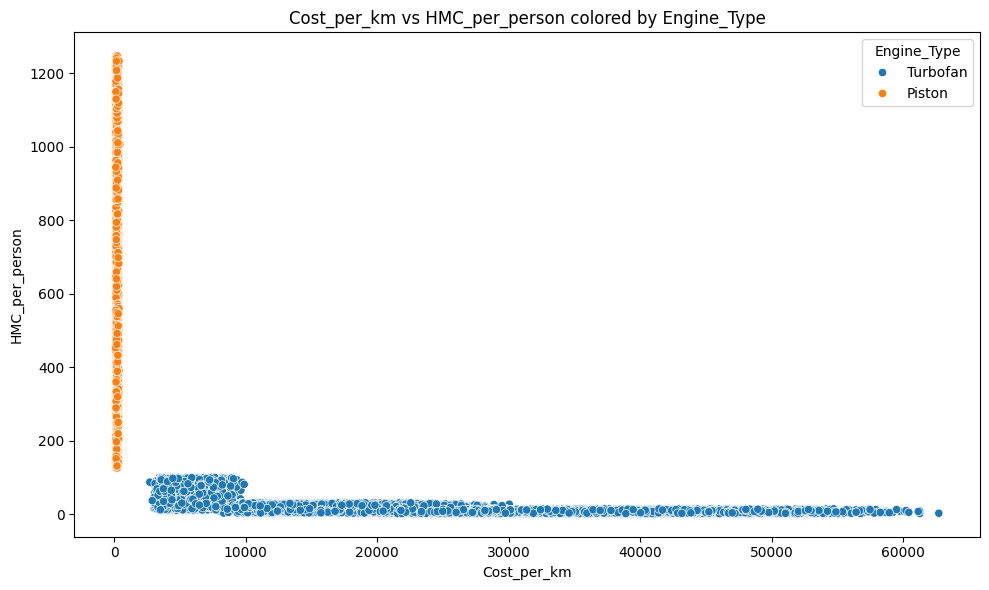

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost_per_km', y='HMC_per_person', hue='Engine_Type', data=df)
plt.title("Cost_per_km vs HMC_per_person colored by Engine_Type")
plt.tight_layout()
plt.savefig("../visuals/scatter_cost_hmc.png")
plt.show()

In [47]:
fig = px.scatter(df, x='Range_(km)', y='Price_($)', color='Company', hover_data=['Model','Engine_Type','Sales_Region'])
fig.show()